# ELO RATING SYSTEM

#### In this notebook we will rate each ipl team using a technique called ELO Rating System. This technique is usally used in chess to rate various player. But here with cetain assumption and changes we will rate each ipl team based on all the matched they played starting from 2008 till 2019. 

   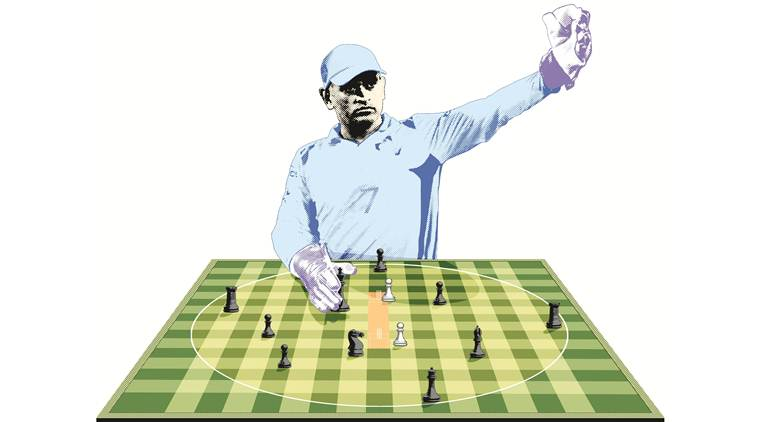

## Introduction

 Elo Rating Algorithm is widely used rating algorithm that is used to rank players/teams in many competitive games. It is widely used in chess. Players with higher ELO rating have a higher probability of winning a game than a player with lower ELO rating. After each game, ELO rating of players is updated. If a player with higher ELO rating wins, only a few points are transferred from the lower rated player. However if lower rated player wins, then transferred points from a higher rated player are far greater.

## Components of the Elo Ratings

Elo is mainly designed to rate chess players. Here in our analysis we will apply the elo rating concept on ipl teams. 
<br>
There are mainly three main component of this rating system. 
> <br>
<br>
<b> 1. Intial Ratings </b> - At starting every players are assigned with a default score. This default score definitely has  influence on the ratings. The intials ratings are some sort of baseline . At any given point in time if a player's rating is below the intials ratings that means that player is performing badly. At the same time if a player's rating is eventually higher than the baseline rating then we can say this player is performing pretty well. 

> <br>
<br>
<b> 2. Probability of Winning </b> - In a match between two players the probability of winning will be same for both the player if the rating of the players are same. Now As we are analysing a cricket match we changed the formula for calculating the probablity of a team. 

                                     r1 = Rating of Team A. 
                                     r2 = Rating of Team B.
                                     P1 = Probability of winning for Team A.
                                     P2 = Probability of winning for Team B.

> In our analysis we used the below formula for probability calculation..
                                     
                                     P1 = r1 / (r1+r2)
                                     P2 = r2 / (r1+r2)

> ** In actual elo rating system for chess player ranking, the probability calculation formula is bit different.

> <br>
> <b> 3. Rating Shifting Factor </b> - This is basically a parameter or factor by which rating's from lossing team to be shifted to wining team. It is denoted as <b>'K'</b>. 
> <br>
> After every game the rating is updated for both team using the below formula.. 
> <br>
> <br>

                                     CASE-1 : Suppose Team A wins:
                                     
                                     r1 = r1 + k*(1 – P1) 
                                     r2 = r2 + k*(0 – P2)


                                     CASE-2 : Suppose Team B wins:

                                     r1 = r1 + k*(0 – P1) 
                                     r2 = r2 + k*(1 – P2)

>  K is a constant. If K is of a lower value, then the rating is changed by a small fraction but if K is of a higher value,  then the changes in the rating are significant. Different organizations set a different value of K.
<br>

### Example

                               Let's say there is a match between team A and team B. 

                               k = factor of shifting of rating = 30 
                               r1 = Rating of Team A before match starts = 1100
                               r2 = Rating of Team B before match starts = 900


                               P1 = Probability of winning for Team A 
                                  = 1100 / (1100 + 900) 
                                  = 0.55
                                  
                               P2 = Probability of winning for Team A 
                                  = 900 / (1100 + 900) 
                                  = 0.45


> Let's say team B win the match. Now the updated rating will be..

                               r1_updated = r1 + k*(0-p1) 
                                          = 1100 + 30*(0-0.55) 
                                          =  1083.5
                                          
                               r2_updated = r2 + k*(1-p2) 
                                          = 900 + 30*(1-0.45) 
                                          = 916.5 

#### In the below section of the code we will apply all the above mentioned technique to ipl teams and will check how the elo rating changes after each seasons

In [ ]:
''' Importing all the necessary module '''

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
''' Reading the match file only. '''

match_df = pd.read_csv('/kaggle/input/ipl-data-set/matches.csv')
print(match_df.shape)

In [ ]:
''' Glimps of data.. '''

match_df.head()

In [ ]:
''' lets check the season '''
match_df['Season'].unique()

In [ ]:
''' lets select the only thouse mathch where result comes. remove all the no result matchs. '''

print("possible result of the match.. = ", match_df['result'].unique())
match_df = match_df[match_df['result'] !=  'no result']
print("shape of the match_df  after filtering = ", match_df.shape)

In [ ]:
''' Lets check the teams .. '''

match_df['team1'].unique()

In [ ]:
''' Combinding the below two combinations of team.. 

Deccan Chargers --> Sunrisers Hyderabad
Delhi Daredevils --> Delhi Capitals
  
'''
match_df['team1'] = match_df['team1'].apply(lambda x : 'Sunrisers Hyderabad' if x == 'Deccan Chargers' else x)
match_df['team2'] = match_df['team2'].apply(lambda x : 'Sunrisers Hyderabad' if x == 'Deccan Chargers' else x)

match_df['team1'] = match_df['team1'].apply(lambda x : 'Delhi Capitals' if x == 'Delhi Daredevils' else x)
match_df['team2'] = match_df['team2'].apply(lambda x : 'Delhi Capitals' if x == 'Delhi Daredevils' else x)

In [ ]:
''' Lets check the unique teams now... ''' 

match_df['team1'].unique()

In [ ]:
''' lets not consider the team who are not part of ipl currently. '''

depricated_team = ['Rising Pune Supergiant', 'Gujarat Lions', 'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants']

print("shape of match_df before filtering = ", match_df.shape)
match_df = match_df[~ match_df['team1'].isin(depricated_team) ]
match_df = match_df[~ match_df['team2'].isin(depricated_team)]
print("shape of match_df after filtering = ", match_df.shape)

In [ ]:
''' Lets check the unique teams now.. '''

match_df['team1'].unique()

In [ ]:
''' Lets check how many match played by each team. ''' 

team1_df = pd.DataFrame({'home_count': match_df.groupby(['team1'])['id'].count()})
team1_df.reset_index(inplace = True)
team1_df.columns = ['team', 'home_count']

team2_df = pd.DataFrame({'away_count': match_df.groupby(['team2'])['id'].count()})
team2_df.reset_index(inplace = True)
team2_df.columns = ['team', 'away_count']

team_count_df = pd.merge(team1_df, team2_df, on = 'team')

team_count_df['total_count'] = team_count_df['home_count'] + team_count_df['away_count']

plt.figure(figsize=(20, 8))
sns.barplot(x = 'team', y = 'total_count', data = team_count_df, palette = 'tab20')

### Mumbai Indians played height number of matchs.

## ELO RATING CALCULATION

Here We take some default values to start our analysis. 

* **Intials rating of all the teams are set to 1000. Its basically the default rating just before the tournament starts on 2008.** 
* **The value of k is set to 30.** 

Please feel free to choose any values as per your assumption. 

In [ ]:
def calculate_elo(team1_rating, team2_rating, winner = 'team1', k = 30):
    team1_prob = team1_rating / (team1_rating + team2_rating) 
    team2_prob = team2_rating / (team1_rating + team2_rating) 
    
    if winner == 'team1':
        team1_rating = round(team1_rating + k * (1 - team1_prob))
        team2_rating = round(team2_rating + k * (0 - team2_prob))
    else:
        team1_rating = round(team1_rating + k * (0 - team1_prob))
        team2_rating = round(team2_rating + k * (1 - team2_prob))
        
    
    return (team1_rating, team2_rating)

In [ ]:
''' Assigning default rating of 1000 to each team starting of the tournament.. '''

unique_team_list = list(match_df['team1'].unique())
rating_dict = dict()

for team in unique_team_list:
    rating_dict[team] = 1000
    
''' Setting the default value of k as 10 '''

k = 30

''' lets analysize season wise.. '''

season_list = ['IPL-2008', 'IPL-2009', 'IPL-2010', 'IPL-2011',
       'IPL-2012', 'IPL-2013', 'IPL-2014', 'IPL-2015', 'IPL-2016', 'IPL-2017',
       'IPL-2018', 'IPL-2019']

for season in season_list:
    print("***************** ELO RATINGS OF TEAM AFTER "+ season + " ******************")
    match_temp = match_df[match_df['Season'] == season][['team1', 'team2', 'winner']]
    
    for index, row in match_temp.iterrows():
        team1 = row['team1']
        team2 = row['team2']
        winner_team = row['winner']
        
        team1_rating = rating_dict[team1]
        team2_rating = rating_dict[team2]
        winner = 'team1'
        
        if winner_team == team2:
            winner = 'team2'
            
        team1_rating, team2_rating = calculate_elo(team1_rating, team2_rating, winner, k)
        
        rating_dict[team1] = team1_rating
        rating_dict[team2] = team2_rating
        
    keys = list(rating_dict.keys())
    values = list(rating_dict.values())
    plt.figure(figsize=(10, 5))
    sns.barplot(y = keys, x = values, palette = 'tab20')
    plt.show()

In [ ]:
rating_dict

## * After considering all the matches played between the above teams from 2008 to 2019. 
### * We came to a score where **Chennai Super Kings** is leading with a score of 1393. 
### * **Delhi Capitals** ranked last with a rating score of 462.  

#### I would request you to keep play with the value of k . And check how the ratings of the team vary with the varying values of k.